In [1]:
from catClassifier_ex_1 import CatClassifierMultiDim
from catClassifier_ex_2 import CatClassifierBoost
from catClassifierPlot import plotCatClassifier
import numpy as np
import matplotlib.pyplot as plt

# Ex1

In [2]:
X_train = np.loadtxt('cat_data_X_train.csv', delimiter=" ")
y_train = np.loadtxt('cat_data_y_train.csv')
X_test = np.loadtxt('cat_data_X_test.csv', delimiter=" ")

### Explication des paramètres
Le modèle `CatClassifierMultiDim` définit 3 paramètres :
- `h`: Valeur du seuil de décision
- `d`: Dimension sur laquelle appliquer le seuil (le modèle tel que défini n'utilise au final qu'une dimension pour classifier les données, on établi donc quelle dimension utiliser)
- `z`: Le sens de classification (Avec une dimension et un seuil, on a deux zones, multiplier par -1 ou 1 permet de déterminer quelle classe est dans quelle zone)

### Q2

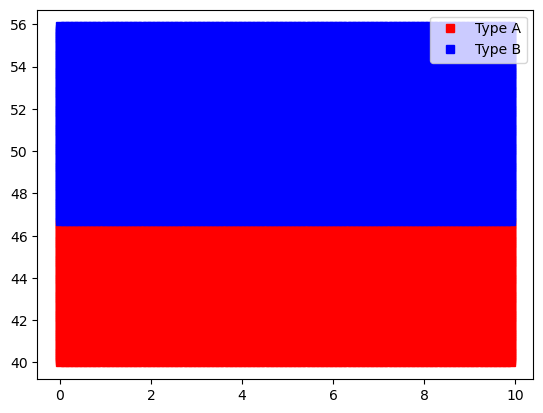

In [3]:
clf = CatClassifierMultiDim()
clf.fit(X_train, y_train)
plotCatClassifier(clf)

In [4]:
print(f"Train loss: {clf.err_emp(X_train, y_train)}")
# y_test is missing, cannot compute test loss
# print(f"Test loss: {clf.err_emp(X_test, y_test)}")

print(f"Best parameters:\nh = {clf.h}\nd = {clf.d}\nz = {clf.z}")

Train loss: 0.04
Best parameters:
h = 46.679
d = 1
z = -1


### Q6 & Q7

Global train loss: 0.04
K = 3



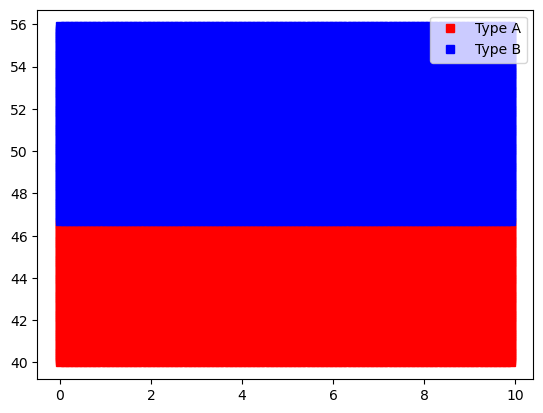

Global train loss: 0.02666666666666667
K = 10



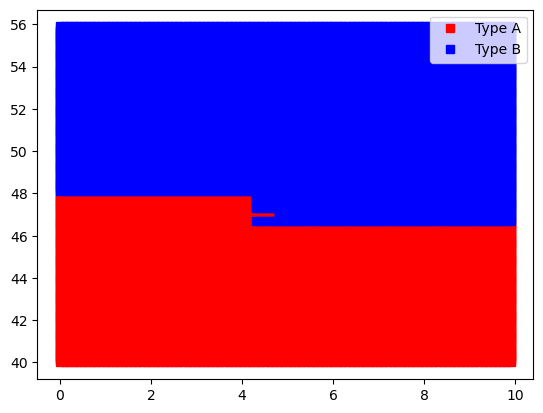

Global train loss: 0.03
K = 20



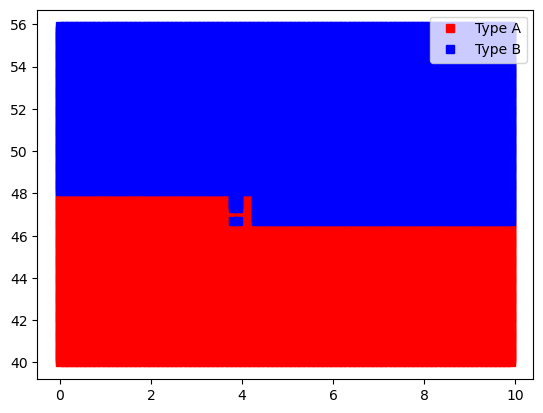

Global train loss: 0.023333333333333334
K = 30



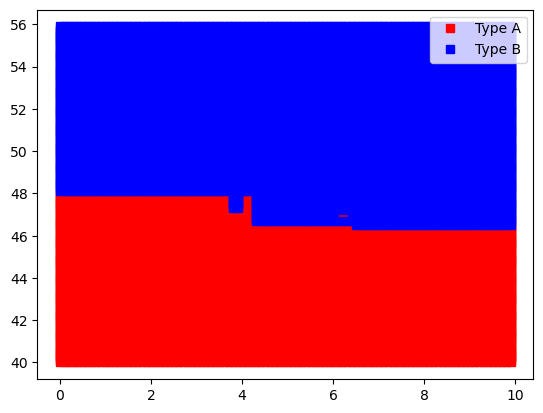

Global train loss: 0.016666666666666666
K = 40



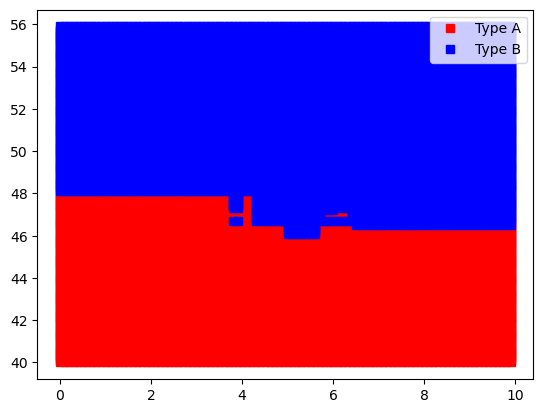

In [5]:
for K in [3, 10, 20, 30, 40]:
    clf = CatClassifierBoost()
    clf.fit(X_train, y_train, K=K) # set verbose=True to see details of each model
    print(f"Global train loss: {clf.err_emp(X_train, y_train)}\nK = {K}\n")
    plotCatClassifier(clf)
    plt.show()

### Q8 & Q9

In [6]:
from sklearn.model_selection import StratifiedKFold

X, y = X_train.copy(), y_train.copy() # Rename to divise train set in train + validation sets
max_k = 41

losses = []
mean_loss_kfold = []

split = StratifiedKFold(n_splits=20)
for K in range(1, max_k):
    losses_kfold = []
    for train_index, val_index in split.split(X, y):
        clf = CatClassifierBoost()
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        clf.fit(X_train, y_train, K=K)
        losses_kfold.append(clf.err_emp(X_val, y_val))
    if K % 5 == 0:
        print(f"K = {K}, mean loss = {np.mean(losses_kfold)}, losses = {losses_kfold}")
    mean_loss_kfold.append(np.mean(losses_kfold))

    clf = CatClassifierBoost()
    clf.fit(X, y, K=K)
    losses.append(clf.err_emp(X, y))

plt.plot(range(1, max_k), mean_loss_kfold, label="Validation loss")
plt.plot(range(1, max_k), losses, label="Train loss")
plt.legend()
plt.show()


K = 5, mean loss = 0.06, losses = [0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.2, 0.06666666666666667, 0.0, 0.13333333333333333]
K = 10, mean loss = 0.06, losses = [0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.2, 0.06666666666666667, 0.0, 0.13333333333333333]
K = 15, mean loss = 0.05333333333333333, losses = [0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.0, 0.0, 0.0, 0.2, 0.06666666666666667, 0.0, 0.06666666666666667]
K = 20, mean loss 

KeyboardInterrupt: 

La validation loss continue de baisser jusqu'à environ k=28-30, puis stagne tandis que la train loss continue de baisser. Cela signifie que le modèle commence à overfitter les données d'entraînement. On en déduit donc que dans notre cas k=28-30 est un bon choix pour le nombre d'itérations.

In [ ]:
clf = CatClassifierBoost()
clf.fit(X, y, K=30)
y_test = clf.predict(X_test)
np.savetxt('y_test_predict.csv', y_test, fmt='%d')

erreur empirique sur le test set : 0.023333333333333334
